# Experiment 02  -  RC Transients

Date: September 19, 2025

Name: Mufaro Machaya

Partner's name: Omar Hui

In [1]:
from common import *

## Introduction

**Learning Goals (from the PDF):**

- know the theory behind RC circuits
- know how to measure capacitance with a DMM
- take the next step in building multi-component circuits
- know how to trigger an oscilloscope to capture transients
- know how to fit data with an exponential in Python

Today's lab is about fitting an exponential decay curve for the charge across the capacitor of an RC circuit, showing how the fitted time constant compares with the actual.

*Measurement Plan*:

1. Build the circuit according to specifications (image included)
2. Measure the resistance of the resistor and the capacitance of the capacitor with the DMM.
3. Setup the wave generator to produce a square wave
4. Setup the oscilloscope to measure the voltage across the capacitor
5. Run the square wave generator and record the voltage graph produced.

**Diagram Tau:**
$$1 \text{ k}\Omega \times 500 \text{ nF } = 0.5 \text{ ms}$$

## Measurements of Resistance and Capacitance

Record the measured values of $R$ and $C$ for the components that you are using in your circuit. To estimate the uncertainties in these values, you will need to consult the manual for your DMM. Use a code cell to input the values and calculate $\tau$ as well as propagate the uncertainties.

$$u[\tau] = \tau \sqrt{ \left(\frac{u[R]}{R}\right)^2 + \left(\frac{u[C]}{C}\right)^2 }$$

In [2]:
capacitance=488.8e-9
#capacitance_uncert=0.05e-9/np.sqrt(3)
capacitance_uncert = capacitance * 0.02 + 5 * 0.1e-9

print('capacitance = %3f +/- %f' % (capacitance, capacitance_uncert))

def manual_measurement(resistance):
    resistance*=1000
    #resistance_uncert=(0.0005*1000)/np.sqrt(3)
    resistance_uncert=resistance * (0.05/100) + 3 * 0.001 * 1000
    print('resistance = %3f +/- %f' % (resistance, resistance_uncert))
    
    tau=resistance * capacitance
    tau_uncert = tau * np.sqrt( (resistance_uncert/resistance)**2 + (capacitance_uncert/capacitance)**2 )
    print('tau = %3f +/- %f' % (tau, tau_uncert))

capacitance = 0.000000 +/- 0.000000


In [3]:
manual_measurement(0.991)

resistance = 991.000000 +/- 3.495500
tau = 0.000484 +/- 0.000010


Note:
- uncertainty calculation was changed to match the direct specifications of the DMM from https://www.manualslib.com/manual/1596837/Aneng-Q1.html?page=23#manual by the advice of the TA, not using the previous method of uncertainty measurement

$$\tau \approx 484 \pm 10 \text{ } \mu\text{s}$$

- had to change the wave generator amplitude from 1 volt to 0.9 volts due to the current being too high, causing the wave to no longer be square at the beginning and middlepoints of each period of the wave (beginning of the trough and the peak respectively)
- the square wave is still unfortunately somewhat curved and the overall signal is still noisy, and this will likely cause complications in reading the data

In [4]:
gopts = VOLTAGE_VERSUS_TIME_GRAPH_OPTIONS

## Round 1

In [5]:
888-(888)/np.e

561.3230562397591

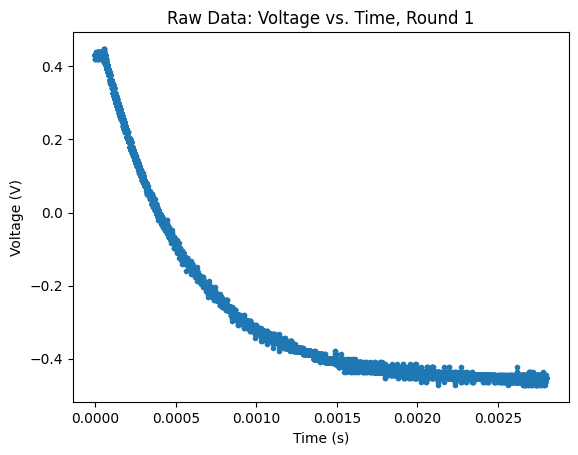

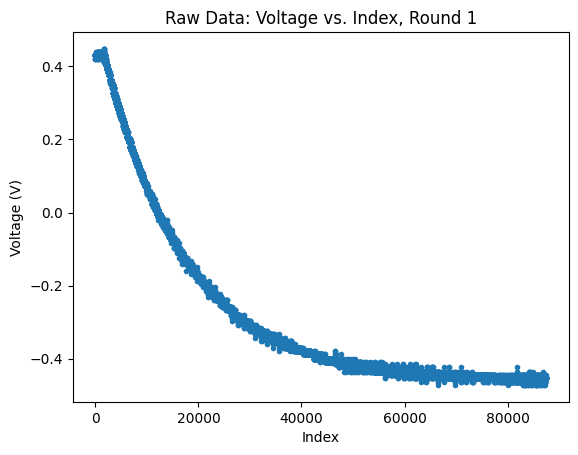

In [6]:
raw1 = load_raw_data('data/round1.csv', plot=True, graphing_options=gopts)

**Observations:**
- Data is extremely noisy, likely both instrumentally and experimentally
- We misset the wave generator so it's producing a maximum value of 900mVpp (-450 to 450) rather than (0, 900) -- we'll adjust this next round

Mean =  -0.45226114285714286 0.0026156296935685597
Standard Deviation (Noise Value) =  0.0026156296935685597


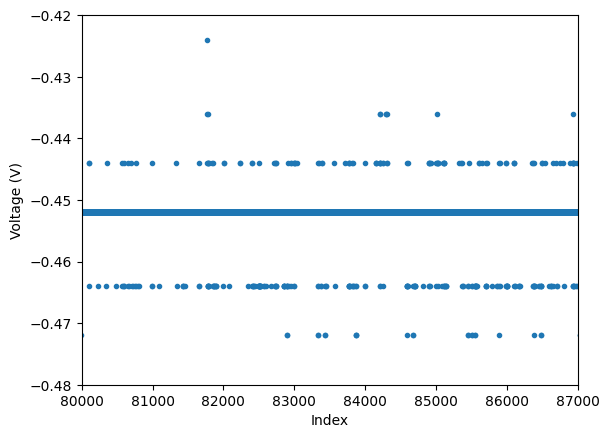

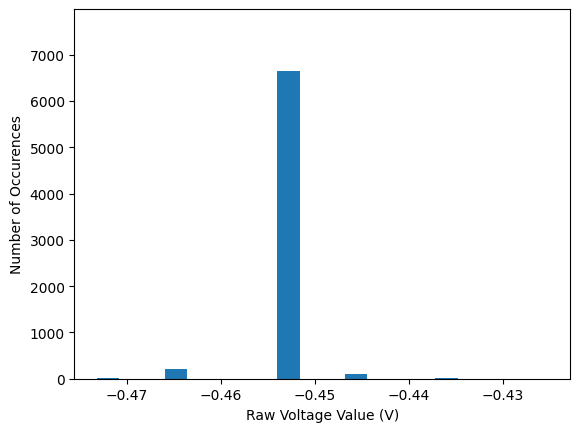

In [7]:
noise1 = isolate_noise(raw1, 
                       indices_range=(80000,87000), 
                       y_range=(-0.48,-0.42),
                       plot=True, graphing_options=gopts)

**Observations:**
- noise is very high for this data, why?

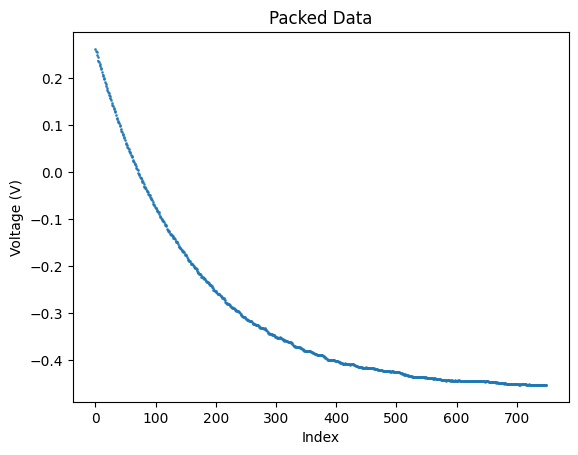

In [8]:
packed1 = pack_data(raw1, p=100, noise=noise1,
                   trim_range=(50,800),
                   plot=True, graphing_options=gopts)

**Observations:**
- Packing was absolutely successful and kept good data, but the residuals for the line look extremely small, perhaps too small (no way to tell for certain yet but we'll see)

In [9]:
guesses1=ExponentialFitParameters(
    amplitude=0.9,
    tau=5e-4,
    offset=-0.45
)

results1 = autofit(packed1, gopts, FitType.EXPONENTIAL, guesses1)

In [10]:
results1.tabulate(print_cov=True, units=('V','Ω*F', 'V'))

+---------------+------------+---------------+
| Measurement   |      Value |   Uncertainty |
+===============+============+===============+
| amplitude (V) |  0.9883    |     8.142e-05 |
+---------------+------------+---------------+
| tau (Ω*F)     |  0.0005096 |     6.596e-08 |
+---------------+------------+---------------+
| offset (V)    | -0.4592    |     1.987e-05 |
+---------------+------------+---------------+
Chi^2 = 34.059
Covariance Values:
amplitude and tau: -4.102e-12
amplitude and offset: 5.354e-10
tau and offset: -1.018e-12




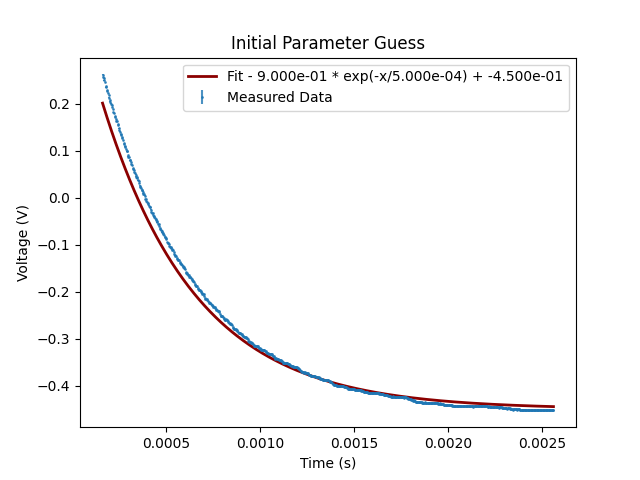

In [11]:
display(results1.initial_guess_graph)

**Observations:**
- Had to set an initial offset of -450mVpp due to the previous obs.
- Initial guesses look mostly okay but I'm definitely still worried about the model being an awful fit due to the residuals being far too low

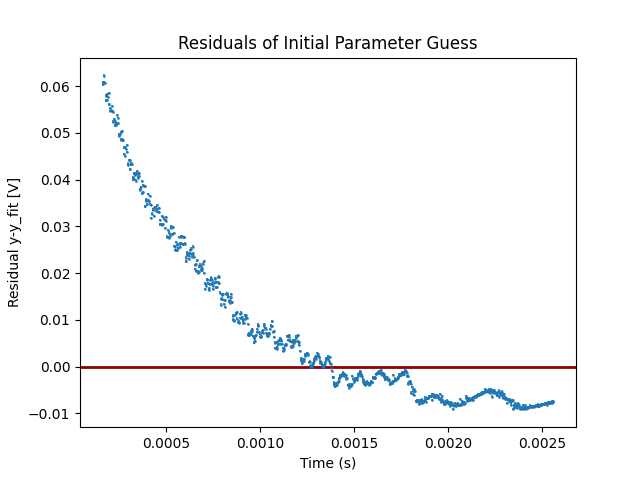

In [12]:
display(results1.initial_guess_residuals_graph)

**Observations:**
- Very much still a clear pattern being seen in the residuals, with worse values the earlier (higher/steeper function)
- Maybe this will get better with the autofit

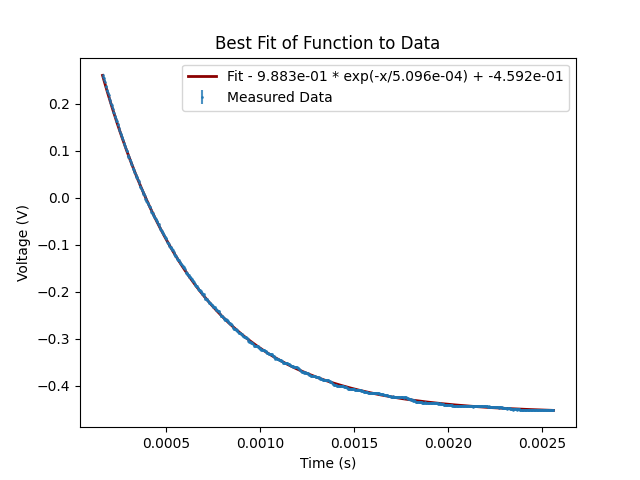

In [13]:
display(results1.autofit_graph)

**Observations:**
- The autofit seems mostly good! Nothing clearly out-of-order from this graph

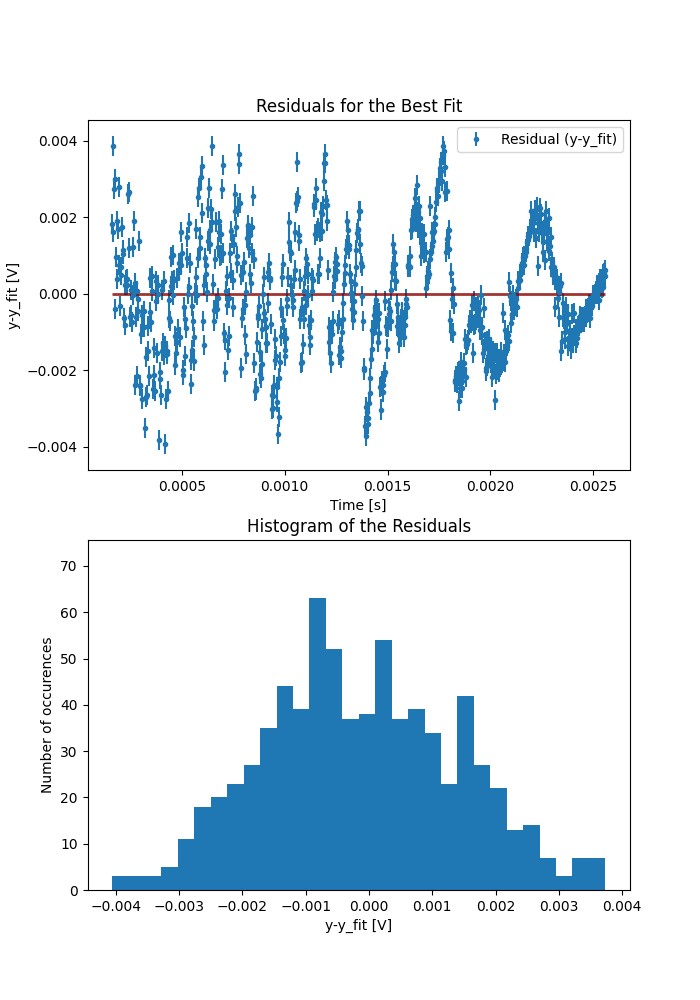

In [14]:
display(results1.autofit_residuals_graph)

**Observations**
- The autofit residuals seem mostly good.
- Obtained a chi-squared of $\chi^2=34.059$ but the residuals have no pattern and the model absolutely seems to fit the data well from visual observation, so the uncertainties are without a single doubt extremely underestimated

You should comment on the quality of the fit and record the best fit parameters and their uncertainty.

Make a rough comparison of the decay time with the expectation for an RC circuit (we will do a more quantitative comparison later).

The expected time constant was $484 \pm 10 \text{ } \mu\text{s},$ and the approximated time constant was $509.60 \pm 0.66 \text{ } \mu\text{s}$, which means that the actual measurement values were incredibly close, but reinforces that the uncertainties in the measurements were still considerably underestimated (??? why ???)

## Measurements with Different Values of the Resistance

You can repeat this whole process with each decay curve that you have collected, and it gets easy to just run the codes on some new data.

You can copy and paste the code cells to run on additional data (don't overwrite your previous results!). You can also start storing the outputs as new variables to make it easier to compile your results and discuss them at the end.

If you would prefer, you can run the codes above with new data, or run them in a separate note book. Then record the results here, including the chi-squared values and best fit parameters with uncertainty. If you want to run the code in a separate notebook, just copy the code cells into a new notebook, or adapt the stand-alone codes that we have provided to you. Either way, you should record all fitting results in this main Expt 02 Jupyter notebook, and also include the figures for each fit. The figures can be read in and displayed using the short code below (just make sure you save each image separately with different filenames or it will be overwritten!).

For each additional resistance value, create a new header. This will make it easier for you to navigate your workbook and for the TAs to mark your work later.

## Round 2 - (~2k Ohm)

In [15]:
gopts.data_round=2

In [16]:
manual_measurement(1.983)

resistance = 1983.000000 +/- 3.991500
tau = 0.000969 +/- 0.000020


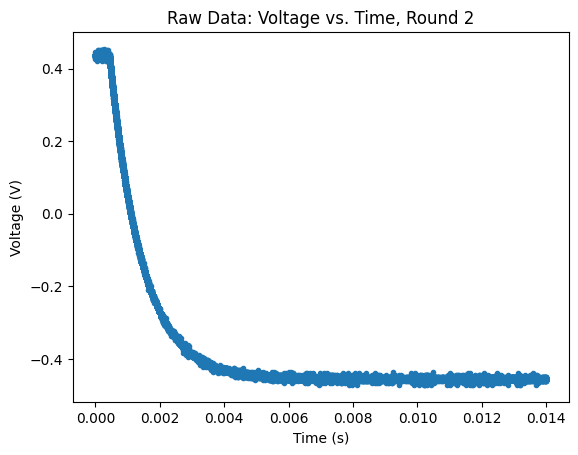

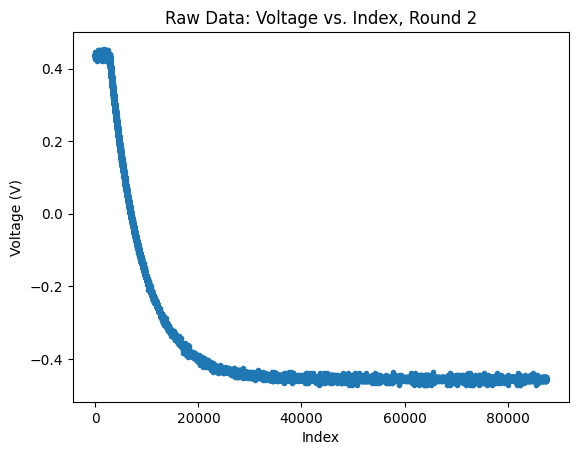

In [17]:
raw2 = load_raw_data('data/round2.csv', plot=True, graphing_options=gopts)

**Observations:**
- data, still, looks quite good
- the tail is too long, though. I may want to trim it out to keep only the decay portion

Mean =  -0.45539799999999997 0.0022859562550495162
Standard Deviation (Noise Value) =  0.0022859562550495162


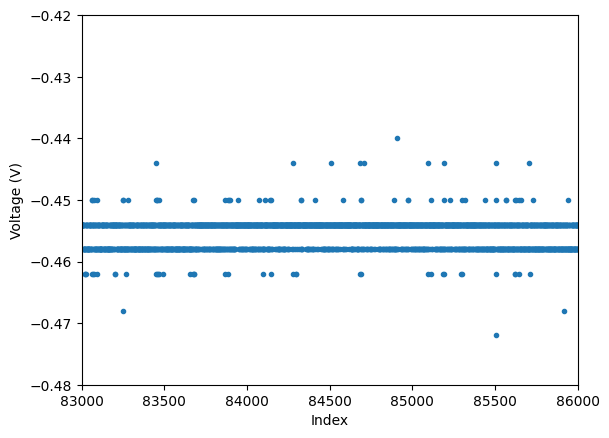

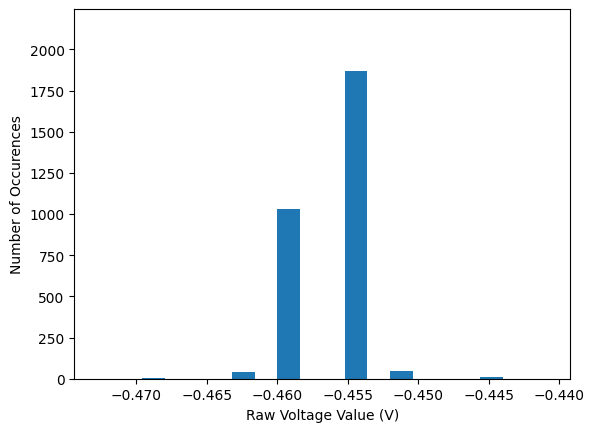

In [18]:
noise2 = isolate_noise(raw2, 
                       indices_range=(83000,86000), 
                       y_range=(-0.48,-0.42),
                       plot=True, graphing_options=gopts)

**Observations:**
- Noise seems to be fairly high, but this means higher uncertainty (which could result in easier fitting)
    - Why is the noise so high?

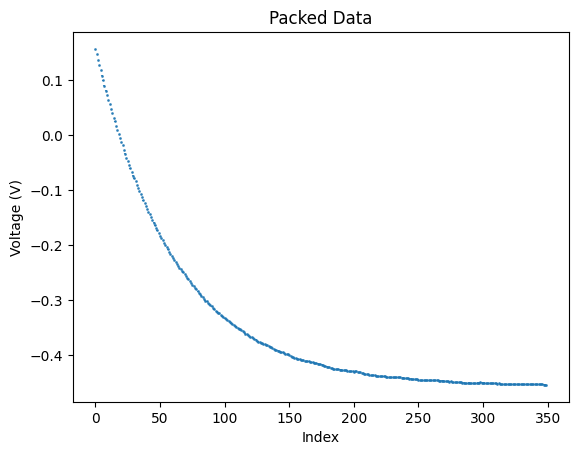

In [19]:
packed2 = pack_data(raw2, p=100, noise=noise2,
                   trim_range=(50,400),
                   plot=True, graphing_options=gopts)

**Observations:**
- packed data seems good
- trimming the data to remove the long tail was likely a good idea (but it probably didn't matter)

In [20]:
guesses2=ExponentialFitParameters(
    amplitude=0.9,
    tau=0.000969,
    offset=-0.45
)

results2 = autofit(packed2, gopts, FitType.EXPONENTIAL, guesses2)

In [21]:
results2.tabulate(print_cov=True, units=('V','Ω*F', 'V'))

+---------------+------------+---------------+
| Measurement   |      Value |   Uncertainty |
+===============+============+===============+
| amplitude (V) |  1.376     |     0.0002936 |
+---------------+------------+---------------+
| tau (Ω*F)     |  0.0009957 |     1.88e-07  |
+---------------+------------+---------------+
| offset (V)    | -0.4555    |     2.155e-05 |
+---------------+------------+---------------+
Chi^2 = 9.278
Covariance Values:
amplitude and tau: -5.090e-11
amplitude and offset: 3.111e-09
tau and offset: -2.875e-12




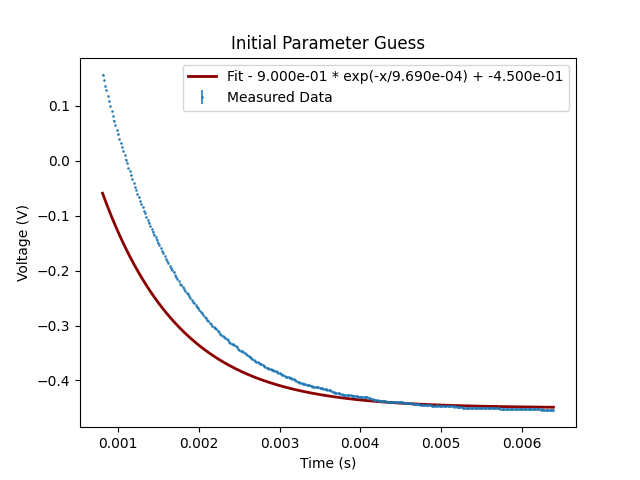

In [22]:
display(results2.initial_guess_graph)

**Observations:**
- the initial guess based on all of the theoretical values is seemingly incredibly off from reality - why?
    - theoretical model just entirely does not work, which is weird 

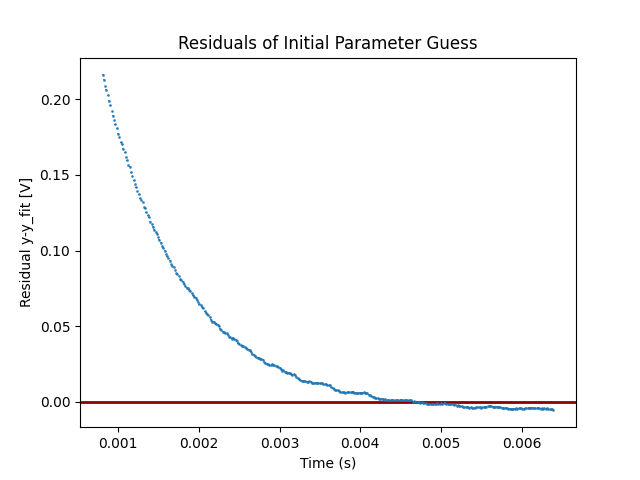

In [23]:
display(results2.initial_guess_residuals_graph)

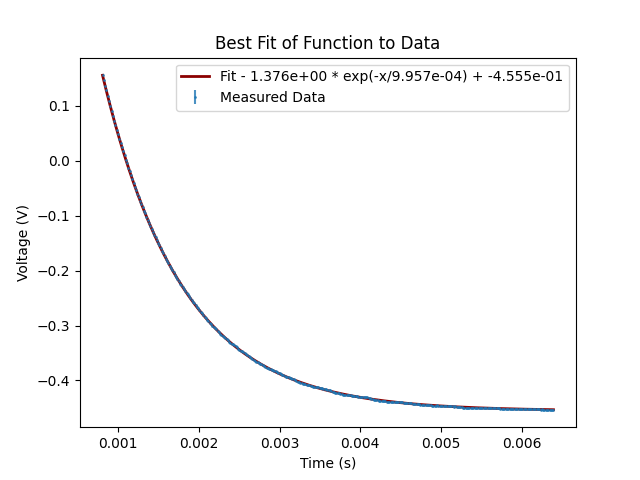

In [24]:
display(results2.autofit_graph)

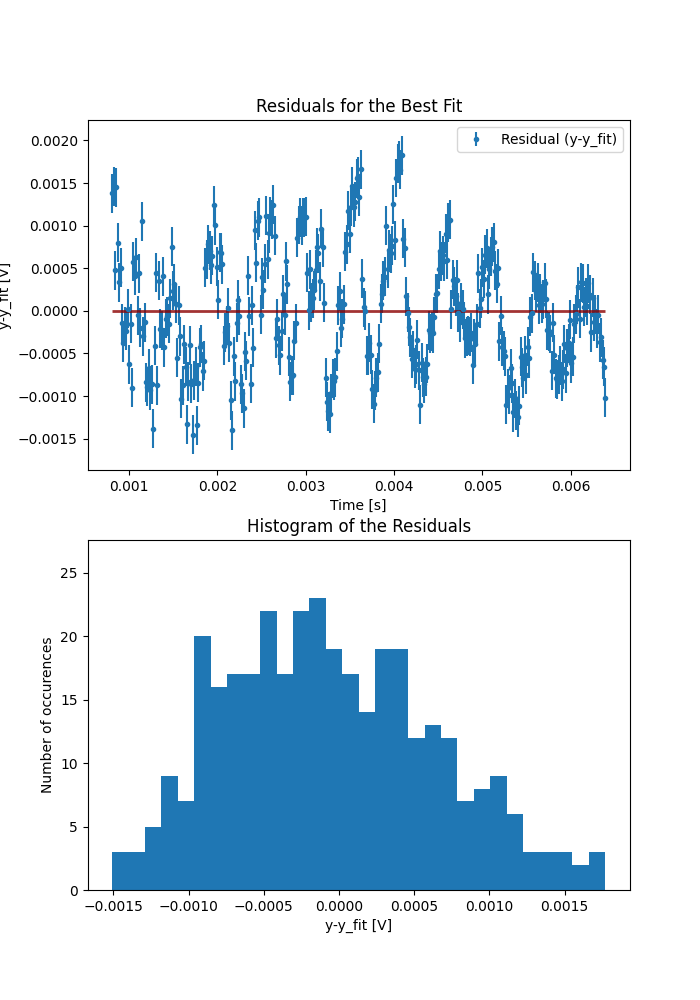

In [25]:
display(results2.autofit_residuals_graph)

**Observations**
- Autofit model obtained a somewhat similar $\tau$ to the expected, getting $\tau = 995.7 \pm 0.2$ $\mu s$ whereas the theoretical calculation predicted $\tau = 969 \pm 20$ $\mu s$, but regardless, there still seems to be quite a bit of deviation between the two values because the actual value isn't within the range of error of the expected value
- The model as well seems to fit as well as possible from visual inspection of the graph and the residuals (completely bisected with no pattern), but still, $\chi^2 = 9.278$ suggests that the model is therefore still not a great fit to the data, suggesting that the residuals are probably underestimated for the actual data (and this is backed up by the scale of error between $\tau$ from expected to actual, the expected $u[\tau]$ is 100 times larger than the actual $u[\tau]$).
    - This uncertainty difference is due to experimental noise calculations. Where else could we increase this uncertainty?
   

## Round 3 (~3k Ohms)

In [26]:
gopts.data_round=3

In [27]:
manual_measurement(2.973)

resistance = 2973.000000 +/- 4.486500
tau = 0.001453 +/- 0.000031


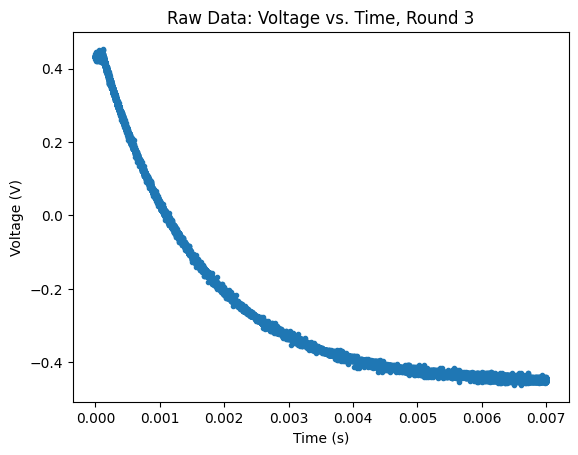

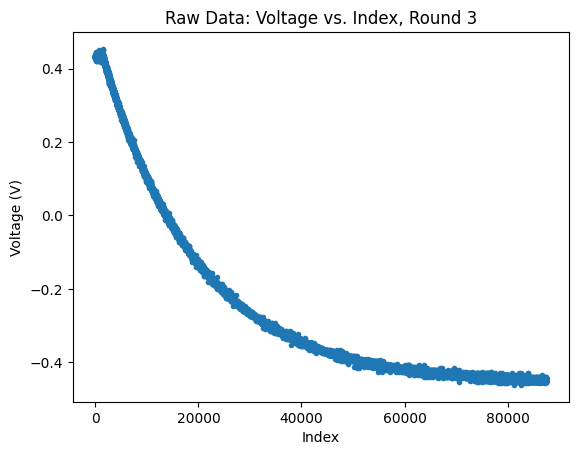

In [28]:
raw3 = load_raw_data('data/round3.csv', 
                     plot=True, 
                     graphing_options=gopts)

**Observations:**
- noise for this data seems fairly high, the curve looks very thick especially towards the tail
- otherwise this dataset seems fairly consistent with previous rounds

Mean =  -0.4473700000000001 0.0032453710625032313
Standard Deviation (Noise Value) =  0.0032453710625032313


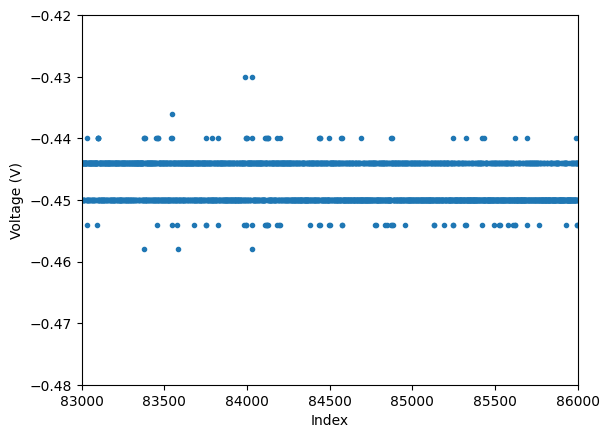

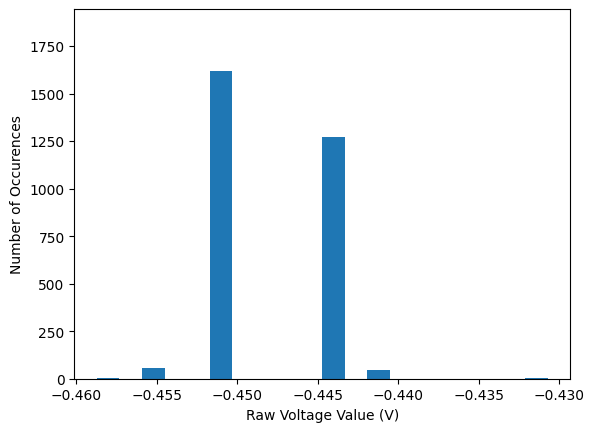

In [29]:
noise3 = isolate_noise(raw3, 
                       indices_range=(83000,86000), 
                       y_range=(-0.48,-0.42),
                       plot=True, graphing_options=gopts)

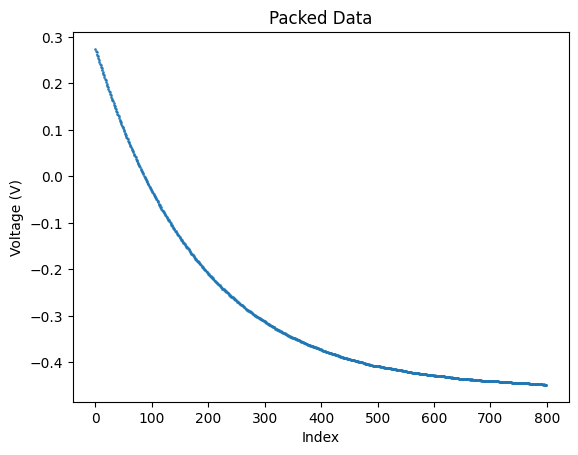

In [30]:
packed3 = pack_data(raw3, p=100, noise=noise3,
                   trim_range=(50,850),
                   plot=True, graphing_options=gopts)

In [31]:
guesses3 = ExponentialFitParameters(
    amplitude=0.9,
    tau=0.001453,
    offset=-0.45
)

results3 = autofit(packed3, gopts, FitType.EXPONENTIAL, guesses3)

In [32]:
results3.tabulate(print_cov=True, units=('V','Ω*F', 'V'))

+---------------+-----------+---------------+
| Measurement   |     Value |   Uncertainty |
+===============+===========+===============+
| amplitude (V) |  0.9597   |     8.562e-05 |
+---------------+-----------+---------------+
| tau (Ω*F)     |  0.001478 |     2.321e-07 |
+---------------+-----------+---------------+
| offset (V)    | -0.4566   |     2.617e-05 |
+---------------+-----------+---------------+
Chi^2 = 2.149
Covariance Values:
amplitude and tau: -1.425e-11
amplitude and offset: 6.766e-10
tau and offset: -4.899e-12




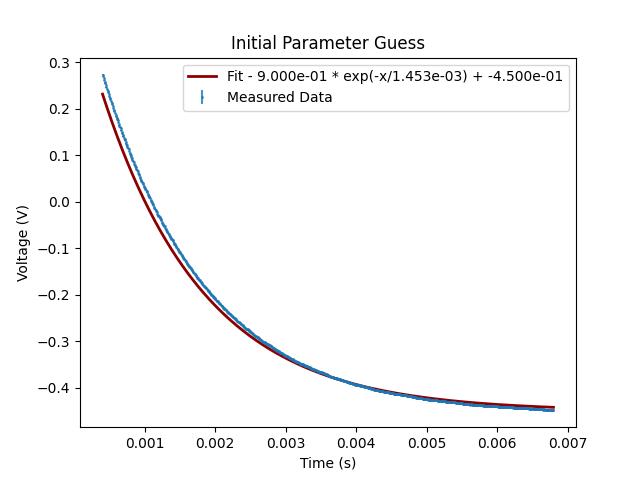

In [33]:
display(results3.initial_guess_graph)

**Observations:**
- The theoretical/expected $\tau$ seems to match the data quite well

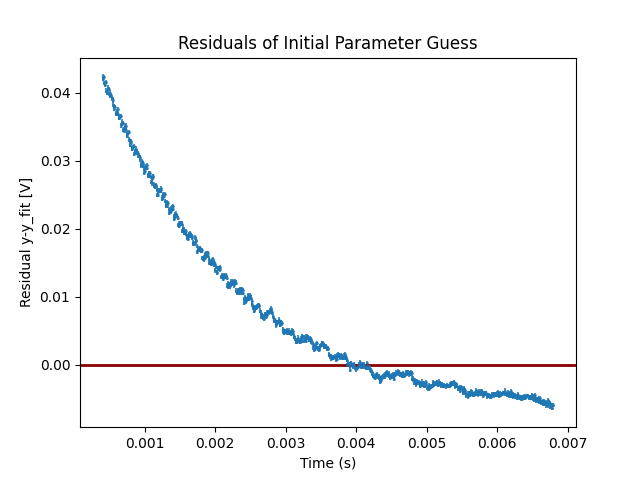

In [34]:
display(results3.initial_guess_residuals_graph)

**Observations:**
- clearly it's not a perfect match though because there is an obvious pattern to these residuals

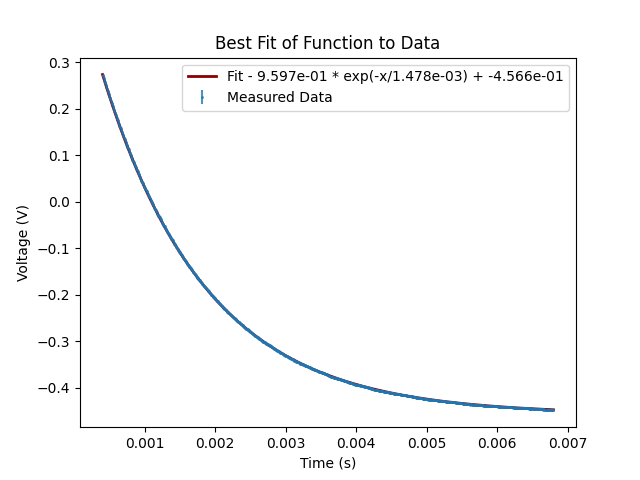

In [35]:
display(results3.autofit_graph)

**Observations:**
- the autofit graph seems almost perfect

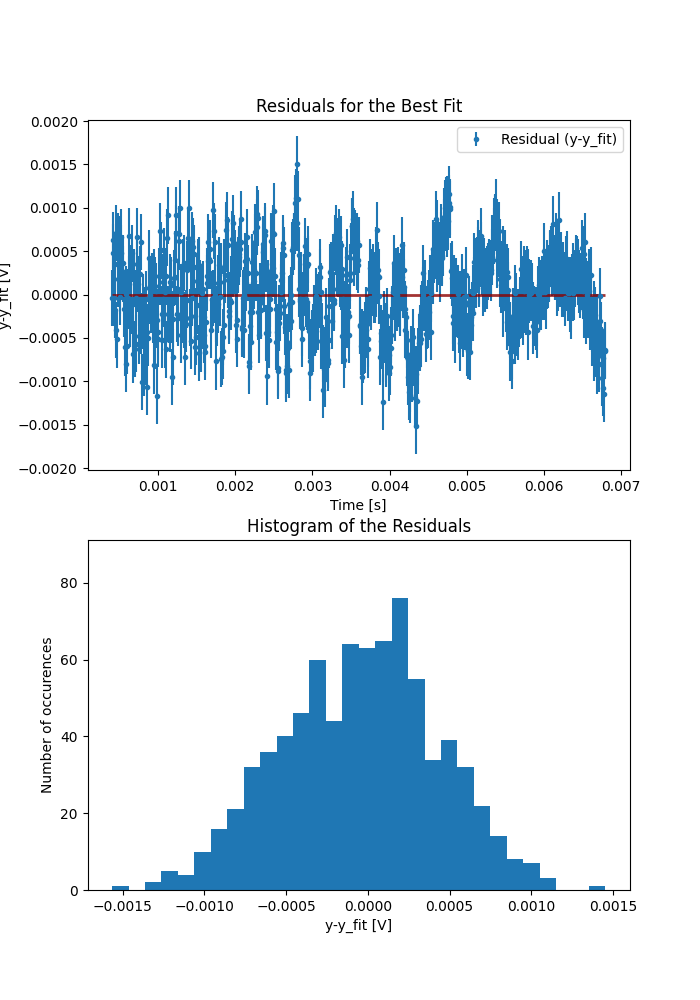

In [36]:
display(results3.autofit_residuals_graph)

**Observations:**
- The model for this round seems almost perfect.The autofit produced $\chi^2 = 2.149$, which is the best so far.
- The expected value was $1453 \pm 31$ $\mu s$ and the actual value was $\tau = 1478.0 \pm 0.2$ $\mu s$, so again, the uncertainty of the actual measurements are extremely underestimated compared to the theoretical value (by a scale of $1/155$).
- Otherwise, however, as we increase resistance, we seem to get better models.
    - How will this hold up overall?

## Round 4 (~4k Ohms)

In [37]:
gopts.data_round=4

In [38]:
manual_measurement(3.967)

resistance = 3967.000000 +/- 4.983500
tau = 0.001939 +/- 0.000041


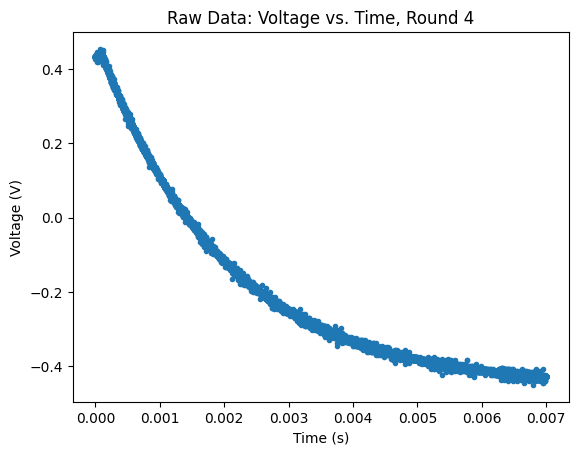

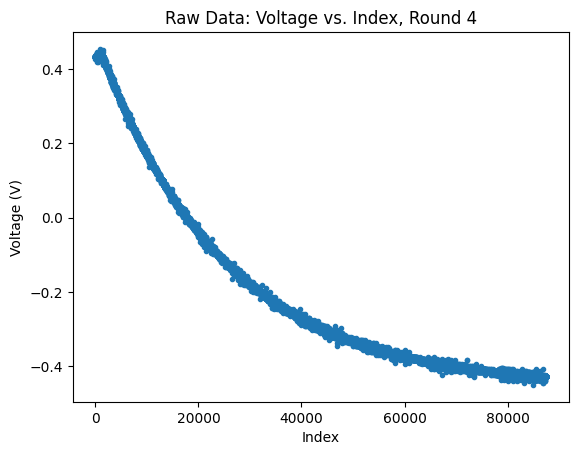

In [39]:
raw4 = load_raw_data('data/round4.csv', 
                     plot=True, 
                     graphing_options=gopts)

**Observations:**
- The graph seems incredibly thick, probably noiser than previous
    - How has noise changed with resistance?

Mean =  -0.4257386666666667 0.0023547904837208406
Standard Deviation (Noise Value) =  0.0023547904837208406


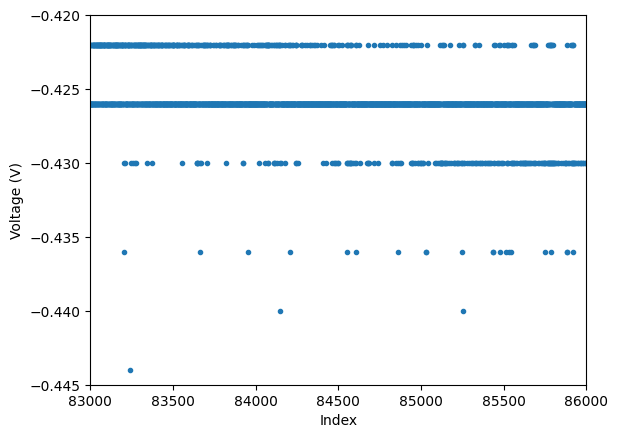

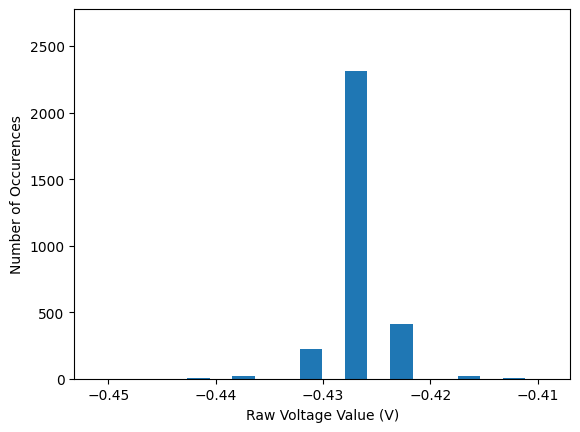

In [40]:
noise4 = isolate_noise(raw4, 
                       indices_range=(83000,86000), 
                       y_range=(-0.445,-0.42),
                       plot=True, graphing_options=gopts)

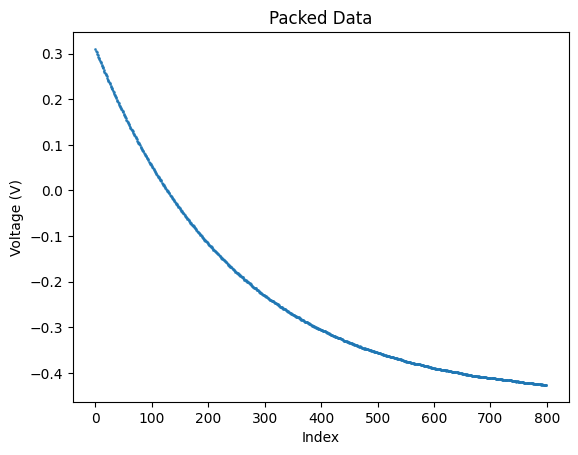

In [41]:
packed4 = pack_data(raw4, p=100, noise=noise4,
                   trim_range=(50,850),
                   plot=True, graphing_options=gopts)

In [42]:
guesses4 = ExponentialFitParameters(
    amplitude=0.9,
    tau=0.001939,
    offset=-0.45
)

results4 = autofit(packed4, gopts, FitType.EXPONENTIAL, guesses3)

In [43]:
results4.tabulate(print_cov=True, units=('V','Ω*F', 'V'))

+---------------+-----------+---------------+
| Measurement   |     Value |   Uncertainty |
+===============+===========+===============+
| amplitude (V) |  0.9395   |     4.648e-05 |
+---------------+-----------+---------------+
| tau (Ω*F)     |  0.001962 |     2.444e-07 |
+---------------+-----------+---------------+
| offset (V)    | -0.4555   |     2.75e-05  |
+---------------+-----------+---------------+
Chi^2 = 4.812
Covariance Values:
amplitude and tau: -5.909e-12
amplitude and offset: 2.113e-10
tau and offset: -5.967e-12




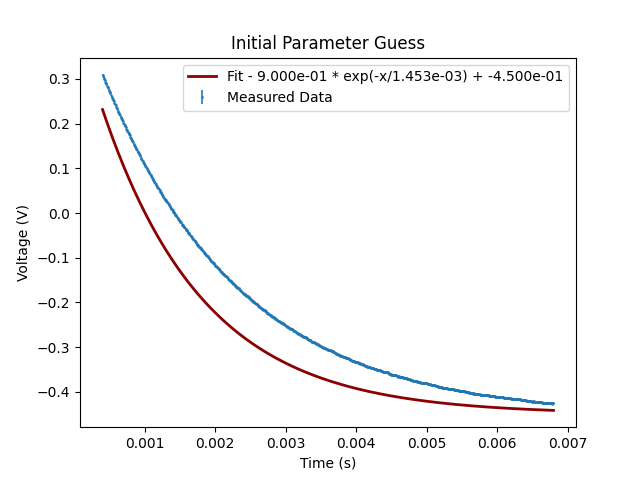

In [44]:
display(results4.initial_guess_graph)

**Observations:**
- The theoretical model seems to not match the graph (why? this breaks our previous pattern)

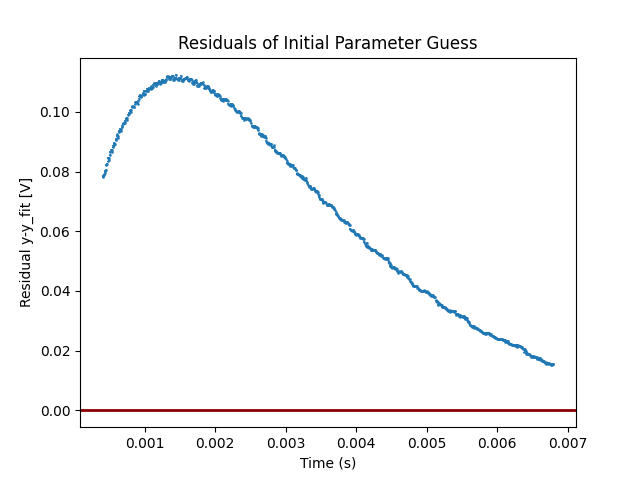

In [45]:
display(results4.initial_guess_residuals_graph)

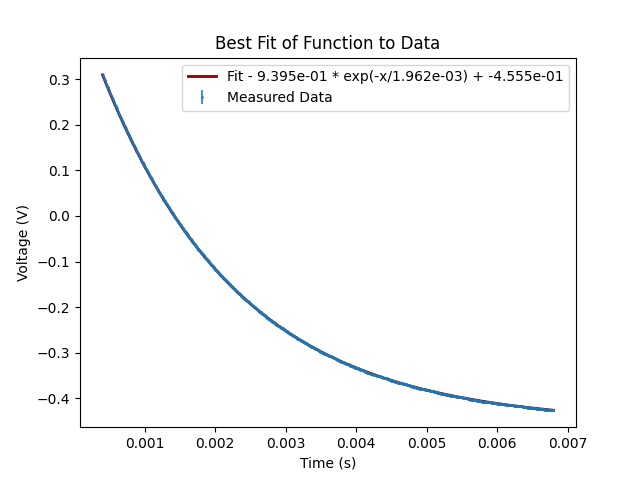

In [46]:
display(results4.autofit_graph)

**Observations:**
- This generally seems to match our data from visual inspection 

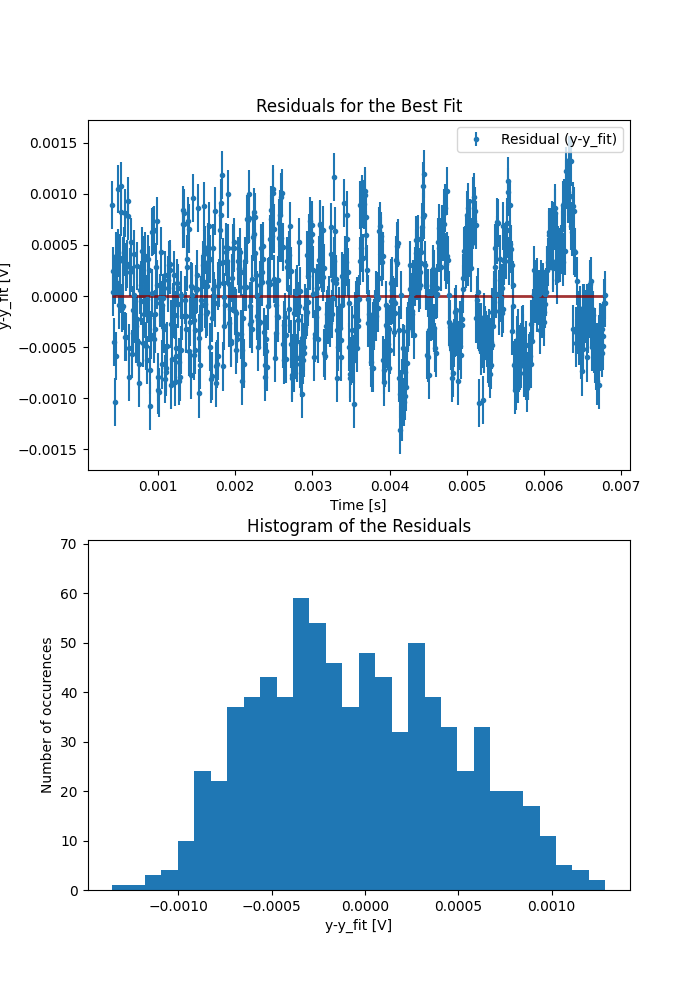

In [47]:
display(results4.autofit_residuals_graph)

**Observations:**
- The model seems to match, the residuals are bisected perfectly
- Despite previous hypothesis, the model actually got worse at a higher resistance (need to plot resistance vs. model data) because now we're at $\chi^2 = 4.812$
- Theoreical model expected $\tau = 1939 \pm 41$ $\mu s$ and the autofit obtained $\tau = 1962.0 \pm 0.2$ $\mu s$, so again, same problem with the uncertainties being underestimated
    - How can we fix this, we would get better models if the uncertainties were not underestimated??

# Conclusion

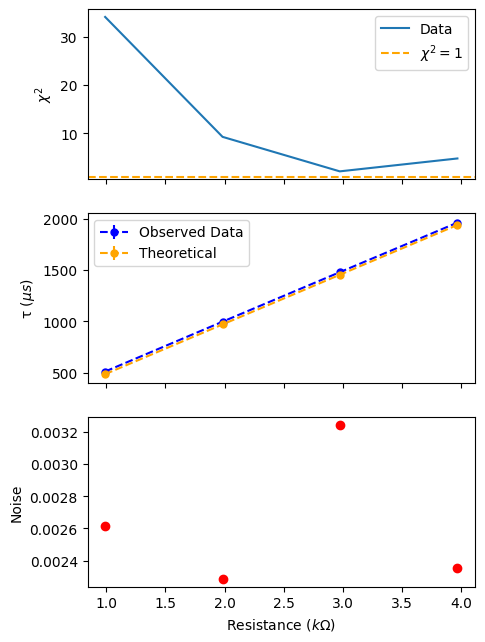

In [85]:
rounds = [results1,results2,results3,results4]

resistances=np.array([0.991,1.983,2.973,3.967])
noises=np.array([noise1,noise2,noise3,noise4])

taus_actual=np.array([test.parameters.tau for test in rounds])*1e6
dtaus_actual=np.array([test.parameters.tau_uncert for test in rounds])*1e6

taus_predicted=np.array([0.000484,0.000969,0.001453,0.001939])*1e6
dtaus_predicted=np.array([0.000010,0.000020,0.000031,0.000041])*1e6

chi2s=np.array([test.chi2 for test in rounds])

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(5,7.5))
axs[0].set_ylabel('$\chi^2$')
axs[0].plot(resistances,chi2s,label='Data')
axs[0].axhline(y=1,ls='--',color='orange',label='$\chi^2=1$')
axs[0].legend()

axs[1].set_ylabel('τ $(\mu s)$')
axs[1].errorbar(resistances, taus_actual, yerr=dtaus_actual,
                label='Observed Data',
                linestyle='--',
                marker='.',
                markersize=10,
                color='blue')
axs[1].errorbar(resistances, taus_predicted, yerr=dtaus_predicted,
                label='Theoretical',
                linestyle='--',
                marker='.',
                markersize=10,
                color='orange')
axs[1].legend()

axs[2].set_ylabel('Noise')
axs[2].set_xlabel('Resistance ($k \Omega$)')
axs[2].scatter(resistances, noises, color='red')
plt.show()

**Observations:**
- Model fits generally got better with increased resistance, and this is probably due to instrumental/physical reasons, like the electronics becoming less sensitive at higher resistances or so
    - backed up by the $\chi^2$ vs. resistance graph
- My prior hypothesis that noise went down with resistance is certainly incorrect, as noise was at its peak at about 3 thousand ohms
- In every experiment, the uncertainty of the experimental was highly underestimated compared to the theoretical model and when observed by the $\chi^2$.
    - To improve this experiment, there must be a way to increase the uncertainty. The current method of purely noise-based consideration is wrong: my calculations for noise need to be tweaked to include instrumental uncertainty calculations as well
- Time constant clearly increased with resistance, however, and the rate at which the observed values did largely matched the theoretical values.